In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# image2 = plt.imread("mandrill-1.png")
# plt.imshow(image2)

In [3]:
#Task 1
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

In [4]:
U,S,V = np.linalg.svd(A)

In [5]:
r = 0
approxA = np.outer(U[:,r], S[r] * V[r,:])

In [6]:
# Error of the norm
np.linalg.norm(A - approxA)

1.2906616757612317

In [7]:
np.linalg.norm(approxA)

25.462407436036397

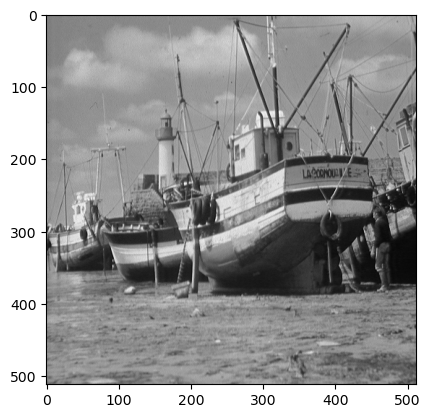

In [8]:
# Task 2 A
image1 = plt.imread("boat-1.png")
plt.imshow(image1,cmap='gray')

In [9]:
image_matrix = np.array(image1)

In [10]:
U,S,V = np.linalg.svd(image_matrix)

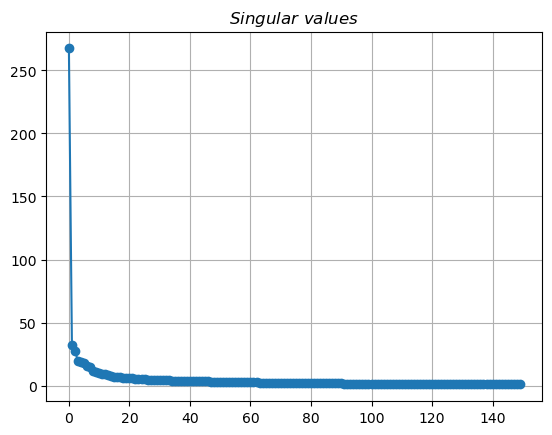

In [11]:
plt.grid()
plt.title("$Singular\ values$")
plt.plot(S[:150],marker="o")

In [47]:
def processImage(image,rank,cmap=None):
    """
    Process an image using Singular Value Decomposition (SVD) and return an approximation.

    Parameters:
    - image (str): The file path or URL of the image to be processed.
    - rank (int): The rank of the approximation, determining the number of singular values to keep.
    - cmap (str or None, optional): Colormap for displaying the image. Default is None.

    Returns:
    - tuple: A tuple containing the following elements:
        - np.ndarray: An approximation of the original image using SVD.
        - float: The Frobenius norm of the difference between the original and the approximated image.
    
    Example:
    ```
    image_path = 'path/to/your/image.jpg'
    rank = 50
    cmap = 'viridis'
    approximation, error = processImage(image_path, rank, cmap)
    ```

    Note:
    - The function reads the image, performs SVD, and reconstructs the image using a specified rank.
    - The colormap (`cmap`) is used when displaying the image with Matplotlib.
    """
    image = plt.imread(image)
    image_matrix = np.array(image)
    U,S,V = np.linalg.svd(image_matrix)
    approxA = np.outer(U[:, 0], S[0] * V[0, :]) #np.outer(U[:,rank], S[rank] * V[rank,:])
    for i in range(1, rank):
        approxA += np.outer(U[:, i], S[i] * V[i, :])
    error = np.linalg.norm( image_matrix - approxA,'fro')
    return approxA, error

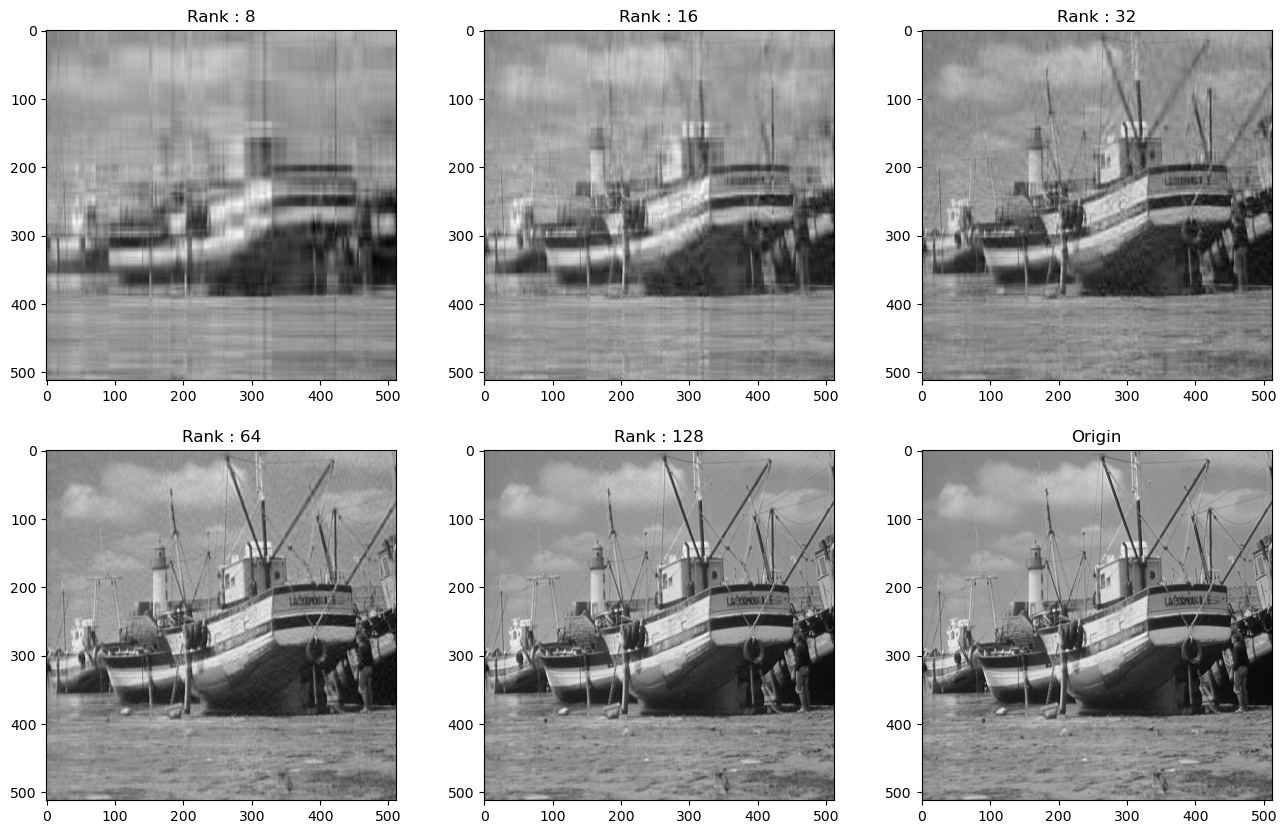

In [48]:
### Task2 B
fig,axes = plt.subplots(2,3,figsize=(4 *4, 10))

ranks = [8, 16, 32, 64, 128]
i = 0
j = 0
for r in ranks:
    img, err = processImage("boat-1.png",r,"gray")
    axes[i//3,j].set_title(f"Rank : {r}")
    axes[i//3,j].imshow(img,cmap="gray")
    i =i+ 1
    j =j+1
    if j == 3:
        j = 0
axes[1,2].set_title("Origin")
axes[1,2].imshow(plt.imread("boat-1.png"),cmap="gray")
plt.plot();


In [54]:
### Task2 C
rank = 1
error = float('inf')
max_err = 0.005

errorList =list()
rankList = list()

for i in range(512):
    global error
    img, err = processImage("boat-1.png",rank,"gray")
    # print(err, rank)
    error = err
    errorList.append(error)
    rank = rank + 1
    rankList.append(rank)
    
    if error <= max_err:
        break

print(error,rank)
    

0.0038376348 510
